In [ ]:
# 연습문제 : 오존 데이터셋(온도에 따른 오존량 예측)
# 1. 판다스를 사용해서 csv파일로 읽어 들인다.
# 필요한 컬럼값만 정리
# 2. 단순회귀분석으로 사용하자.
# 3. 독립변수 : 온도, 종속변수 : 오존량

# 수치형 변수 - 회귀분석
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다.
# 대립가설 : 온도가 오존량에 영향을 미친다.

# 4. 데이터 전처리 : 결측값이 있는지 없는지, 얼마나 있는지(시각화 좋다.) => 결측값 있는 행 제거
# 5. 온도, 오존량이 상관관계가 있는지 없는지 출력, 시각화
# 6. 단순회귀분석

# 회귀곡선

# 7. 서비스를 새로운 온도를 입력
# 예) 화씨 80도 일때의 오존량 예측

In [1]:
# 리눅스에서 한글 설정
import pandas as pd
import numpy as np
import warnings as wr
import matplotlib
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumGothic Eco',
 'NanumBarunpen',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'Nanum Brush Script',
 'NanumMyeongjo Eco',
 'NanumGothicCoding',
 'NanumMyeongjo Eco',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumBarunpen']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
wr.filterwarnings('ignore')

In [3]:
# 1. 판다스를 사용해서 csv파일로 읽어 들인다.
df = pd.read_csv('ozone.csv')
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [4]:
df.shape

(153, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


In [6]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [7]:
df.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [8]:
# 결측치 제거
df2 = df.dropna(axis=0)
#df.dropna(inplace=True)

In [9]:
df2.shape

(111, 6)

In [10]:
df2.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [11]:
# 온도
x2 = df2["Temp"].values
y2 = df2["Ozone"].values
print(x2)
print(y2)

[67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76
 82 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84
 87 85 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78
 78 77 72 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71
 71 78 67 76 68 82 64 71 81 69 63 70 75 76 68]
[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  18.  14.  34.   6.
  30.  11.   1.  11.   4.  32.  23.  45. 115.  37.  29.  71.  39.  23.
  21.  37.  20.  12.  13. 135.  49.  32.  64.  40.  77.  97.  97.  85.
  10.  27.   7.  48.  35.  61.  79.  63.  16.  80. 108.  20.  52.  82.
  50.  64.  59.  39.   9.  16. 122.  89. 110.  44.  28.  65.  22.  59.
  23.  31.  44.  21.   9.  45. 168.  73.  76. 118.  84.  85.  96.  78.
  73.  91.  47.  32.  20.  23.  21.  24.  44.  21.  28.   9.  13.  46.
  18.  13.  24.  16.  13.  23.  36.   7.  14.  30.  14.  18.  20.]


In [15]:
from scipy import stats

In [16]:
result = stats.linregress(x2,y2)
result

LinregressResult(slope=2.4391099055293637, intercept=-147.6460723805951, rvalue=0.6985414096486391, pvalue=1.5526772293928758e-17, stderr=0.23931937849409174)

In [17]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2,y2)

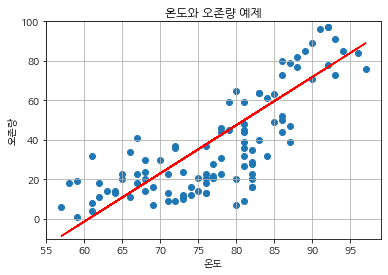

In [28]:
plt.title('온도와 오존량 예제')
plt.grid(True)
plt.scatter(x2,y2)
np_temp = np.array(x2)
plt.plot(np_temp,slope*x2+intercept,c='red')

plt.ylim([-10,100])
# plot(x,y)
plt.xlabel('온도')
plt.ylabel('오존량')
plt.show()

In [19]:
xinput = int(input('온도를 입력하세요:'))
xinput * slope + intercept

온도를 입력하세요:80


47.48272006175401

In [22]:
# 사잇킷런
!pip install mglearn
#import mglearn

     |████████████████████████████████| 542kB 544kB/s eta 0:00:01
  Stored in directory: /home/kosmo1/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [24]:
import mglearn
# 사이킷런 패키지 데이터셋을 로딩
from sklearn.datasets import load_boston
# 회귀분석을 하기 위한 패키지
from sklearn.linear_model import LinearRegression
# 학습용, 검증용 데이터셋을 나누기 위한 패키지
from sklearn.model_selection import train_test_split

In [25]:
# 보스턴 주택가격 데이터 셋을 로딩
boston = load_boston()

In [34]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
print(boston.data.shape)

(506, 13)


In [27]:
print(boston.DESCR)
'''
CRIM : 1인당 범죄율
'''

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# 확장형 데이터 셋(파생 파라미터 변수)
x, y = mglearn.datasets.load_extended_boston()
print(x.shape)

(506, 104)


In [31]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [35]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

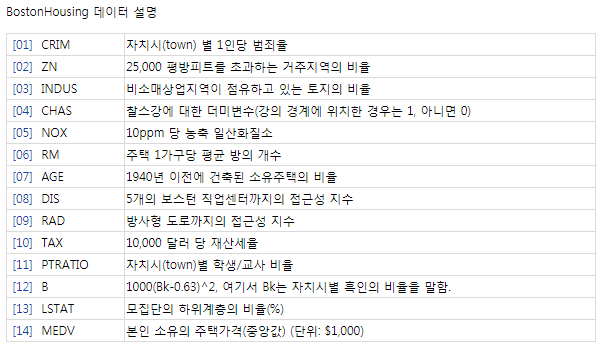

In [37]:
# feature_names를 가져와서 컬럼을 정의한다
df.columns= boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [39]:
# 주택가격이고 예측해야 될 값, 지도학습에서는 y(종속변수)에 해당이 된다.
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [41]:
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
# 확장형 데이터 셋(파생 파라미터 변수)

# 파생변수가 포함된 데이터셋
# 파생변수 : 분석을 하기 위해서 변수를 좀 더 세밀하게 하기 위한 확장기법
# 예 1) 학력 => 남성, 여성 학력을 뽑을 수 있다.
# 예 2) 주민버호 => 앞자리로 성별
x, y = mglearn.datasets.load_extended_boston()
print(x.shape)

(506, 104)


In [43]:
print(x) # 자체적으로 데이터를 정규화 한 과정이 전처리 되어 있다.
print(y) # 주택가격

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2

In [45]:
# 과적합 방지를 위해 사용
# 검증용, test_size=0.3  --- 30%, 학승용 70%
# rain_test_split 함수가 데이터를 나눠주는 함수이다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [46]:
print(x_train.shape)
print(x_test.shape)

(354, 104)
(152, 104)


In [47]:
print(y_train.shape)
print(y_test.shape)

(354,)
(152,)


In [49]:
# 회귀분석 모델에 입력해서 fit 호출해서 기계학습을 실시
# 독립변수값, 종속변수
lr = LinearRegression().fit(x_train, y_train)

In [50]:
print("훈련 데이터셋의 점수 {:2f}".format(lr.score(x_train, y_train)))

훈련 데이터셋의 점수 0.951725


In [52]:
# 과대적합(=훈련이 너무 잘된것) 의심, 해결방법 -> drop out
print("검증 데이터셋의 점수 {:2f}".format(lr.score(x_test, y_test)))

검증 데이터셋의 점수 0.648684


In [53]:
# 훈련 데이터셋 점수와 검증 데이서텟 점수가 다를 때 원인 (과대적합, 과소적합,,,,,,)

# 과적합 방지를 위한 방법 중 하나
# 알고리즘을
# 예) 설문조사에 대한 시물레이션, 독립변수, 종속변수를 너무 잘 맞게 만들때
# 예) 전체 학습된 데이터가 전체 데이터에 비해서 사실상 적을 때(7:3, 8:2 비율 안지켰을때)
# 예) 데이터의 균형적인 문제 : 드랍아웃을 통해서(중복제거) 실제 데이터의 양을 확인 하지 않을 떄
# 예) 입력변수가 상당히 많이 생겼을 때(과대적합)
# 훈련이 너무 잘되었지만, 검증했을 때 검증점수가 적게 나올때 발생한다. 

# 해결 하는 방법은 파라미터를 조정, 데이터 품질에 대해 확인한다.

# 중복된 데이터는 없는지 확인해서 전처리하기.


In [ ]:
# 릿지 회귀 분석( 가중치 - 파라미터 연관, 가중치의 값을 조정 기울기를 최소화)
# 가중치(W 기울기)를 좀 더 작게 만들어 주기 위한 알고리즘이다.